In [1]:
import numpy as np
import time
from scipy import misc
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
import math
import pandas as pd
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
import json

# Function to get read and plot cost comparison data store as txt file

In [2]:
def cost_comparison(file_path):
    data = []

    with open(file_path, 'r') as file:
        content = file.readlines()

    # Skip the header and process each line
    for line in content[1:]:  # Skip the header
        split_line = line.split()  # Split the line by whitespace
        x0 = float(split_line[0])  # Convert to float
        predicted_cost = float(split_line[1])
        numerical_cost = float(split_line[2])
        percent_error = float(split_line[3])

        # Append data to list (x0, predicted_cost, numerical_cost, percent_error)
        data.append([x0, predicted_cost, numerical_cost, percent_error])

    # Convert data to NumPy arrays for plotting
    data = np.array(data)
    x0 = data[:, 0]
    predicted_cost = data[:, 1]
    numerical_cost = data[:, 2]
    percent_error = data[:, 3]

    # Plotting
    plt.figure(figsize=(10, 6))

    plt.plot(x0, predicted_cost, label='Predicted Cost', color='b', marker='o')
    plt.plot(x0, numerical_cost, label='Optimal Cost', color='r', marker='x')
    plt.plot(x0, percent_error, label='Percent Error', color='g', marker='^')

    plt.xlabel('Initial Position of the state variable')
    plt.ylabel('Values')
    plt.title('Cost Comparison')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    
    return data

# Cost Comparison in LQC_Brute force Method

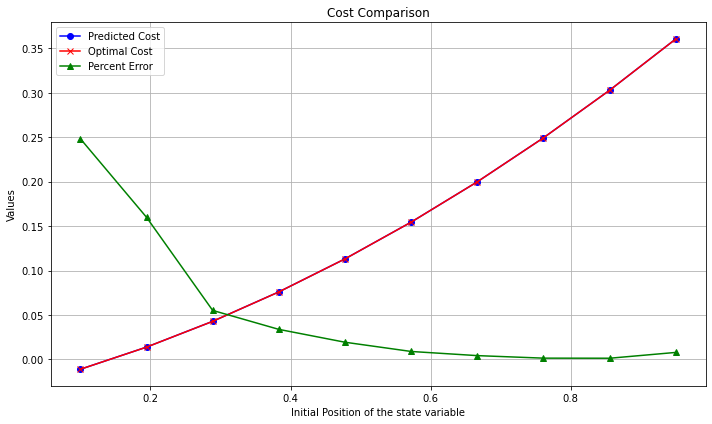

In [3]:
file_path_Brt = 'LQC_N100_Cost.txt'
data_brt=cost_comparison(file_path_Brt)

The training time was around 198 seconds. The parameter values are saved in the file "N100_lqc_dic_uniform_0_1_alpa0.1.json"

#  Cost Comparison in LQC_Multiscale_Closed_Value 

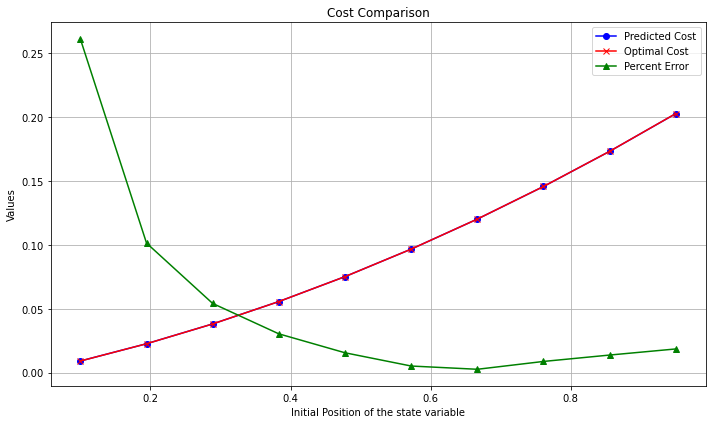

In [4]:
file_path_mlt_clsd = 'LQC_Multiscal_Closed_N100_Cost.txt'
data_clsd=cost_comparison(file_path_mlt_clsd)

The training time for the fine grid was approximately 27 seconds, and for the coarse grid, it was around 13 seconds, totaling about 30 seconds. The parameter values for the fine grid are saved in the file 'N10_fine_dic_uniform_0_1.json,' and for the coarse grid, they are stored in 'N10_lqc_dic_uniform_0_1_alpa1.json.'

Also it is important to note that for the fine tuning we used first. middle and last block.

#  Cost Comparison in LQC_Multiscale_Approximate_Value 

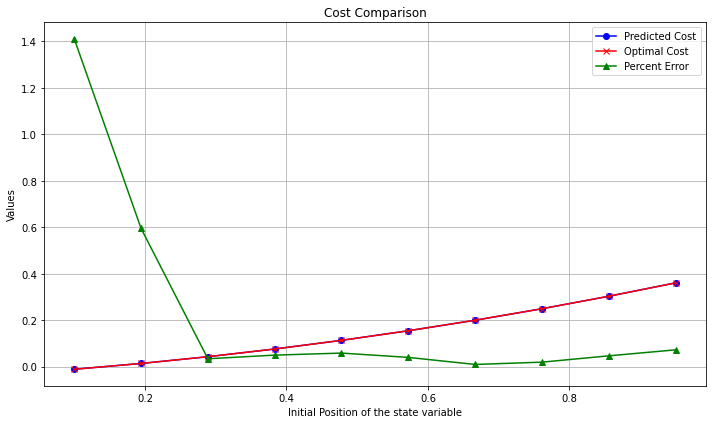

In [5]:
file_path_mlt_aprxt = 'LQC_Multiscal_Apprxmt_N100_Cost.txt'
data_aprxt=cost_comparison(file_path_mlt_aprxt)

The training time for the fine grid was approximately 9 seconds, and for the coarse grid, it was around 13 seconds,totaling about 22 seconds. For the fine grid training we only train the last block as we had a very good approximation of the value function in the last time step. 

# Lets compare the Percent error among these methods 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


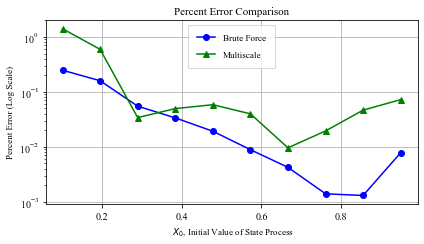

In [6]:
x0 = data_brt[:,0]
err_brt = data_brt[:,3]
err_clsd = data_clsd[:,3]
err_aprxt = data_aprxt[:,3]

name='E:/Robin research/Plots/LQC/Prcnt_er_LQC.eps'
plt.figure(figsize=(6,3.5))
plt.rcParams['font.family'] = 'Times New Roman'

plt.plot(x0, err_brt, label='Brute Force', color='b', marker='o')
# plt.plot(x0, err_clsd, label='Closed Value', color='r', marker='x')
plt.plot(x0, err_aprxt, label='Multiscale', color='g', marker='^')
plt.yscale('log')
plt.xlabel(' $X_0$, Initial Value of State Process',fontsize=9)
plt.ylabel('Percent Error (Log Scale)',fontsize=9)
plt.title('Percent Error Comparison',fontsize=11)
plt.legend(fontsize=9, loc='upper center', bbox_to_anchor=(0.5, 1.0), borderpad=1, labelspacing=1.0, frameon=True)
plt.grid(True)

plt.tight_layout()
plt.savefig(name,format='eps')  
plt.show()

Brute Force Training time = 114 Sec; Time steps = 100; No of Epoch = 1500

Multiscale Training time ~ 26.5 sec (9.39 sec for coarse grid + 13 Sec for control + 4 sec for value function approximation); Time step =100 (Coarse = 10, fine = 10); No of epoch for coarse and fine grid each = 1500; No of epoch for value function = 8000


Processor :	Intel(R) Core(TM) i7-10700 CPU @ 2.90GHz   2.90 GHz\
Installed RAM :	16.0 GB (15.8 GB usable)